# DC motor with observer

In [1]:
import numpy as np
import sympy as sy
sy.init_printing()

In [28]:
s = sy.symbols('s', real=False)
J, gr, b, k, kv, tau, tauc = sy.symbols('J, gr, b, k, k_v, tau, tau_c', real=True, positive=True)
l1, l2, k1, k2 = sy.symbols('l_1, l_2, k_1, k_2', real=True)

In [29]:
# Using physical states x = [omega, theta]
A = sy.Matrix([[-1/tau, 0], [1, 0]])
B = sy.Matrix([[k/tau], [0]])
Bv = sy.Matrix([[1/J], [0]])
C = sy.Matrix([[0, 1]])
            

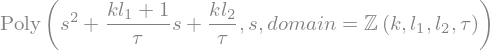

In [30]:
# Charact polynomial
L = sy.Matrix([[l1, l2]])
M = s*sy.eye(2) - (A-B*L)
char_pol = sy.poly(sy.det(M), s)
char_pol


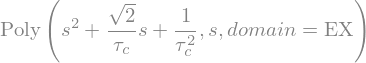

In [31]:
# Desired closed-loop poles
wc = 1/tauc
p1 = wc/sy.sqrt(2)*(-1 + sy.I)
p2 = wc/sy.sqrt(2)*(-1 - sy.I)
char_pol_des = sy.poly((s-p1)*(s-p2), s)
char_pol_des

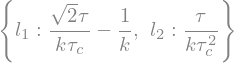

In [32]:
eqns = [c_ - cd_ for c_, cd_ in zip(char_pol.coeffs(), char_pol_des.coeffs())]
sol = sy.solve(eqns, [l1, l2])
sol

## Observer design

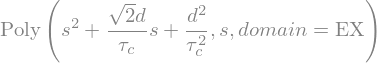

In [33]:
d = sy.symbols('d', real=True, positive=True)
po1 = d*p1
po2 = d*p2
char_pol_des_o = sy.poly((s-po1)*(s-po2), s)
char_pol_des_o

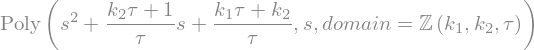

In [34]:
K = sy.Matrix([[k1], [k2]])
char_pol_o = sy.Poly(sy.det(s*sy.eye(2)-(A-K*C)), s)
char_pol_o

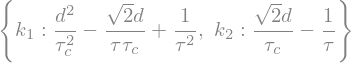

In [35]:
eqns = [c_ - cd_ for c_, cd_ in zip(char_pol_o.coeffs(), char_pol_des_o.coeffs())]
sol_o = sy.solve(eqns, [k1, k2])
sol_o

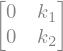

In [36]:
K*C

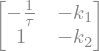

In [37]:
A-K*C

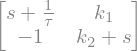

In [38]:
s*sy.eye(2)-(A-K*C)

## Observer gains to eliminate constant input disturbance


Plant dynamics, reference signal $r=0$
$$ \dot{x} = Ax - BL\hat{x} + Bv $$

Observer dynamics
$$ \dot{\hat{x}} = A\hat{x} - BL\hat{x} + KCx - KC\hat{x} + Bv = (A-KC)\hat{x} + KCx + Bv $$

Error dynamics, $\tilde{x} = x-\hat{x}$
$$ \dot{\tilde{x}} = (A-KC)\tilde{x} + Bv $$

Steady-state estimation error
$$ \tilde{x}_{ss} = -(A-KC)^{-1}Bv. $$
Steady-state state
$$0 = Ax_{ss} - BL\hat{x}_{ss} + Bv$$
Steady-state output
\begin{align}
y_{ss} = Cx_{ss} = C\hat{x}_{ss} + C\tilde{x}_ss
\end{align}

In [48]:
kv = Bv[0,0]/B[0,0]
kv


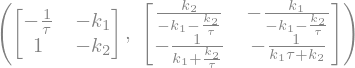

In [49]:
AminKC = A-K*C
AminKCinv = AminKC.inv()
AminKC, AminKCinv

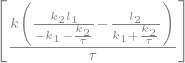

In [50]:
lhs = L*AminKC.inv()*B
lhs

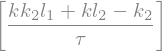

In [51]:
sol = sy.solve(lhs[0,0]+1,k1)
sol

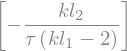

In [52]:
sol = sy.solve(lhs[0,0].subs([(k2, tau*k1)])+1,k1)
sol

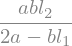

In [53]:
a, b = sy.symbols('a, b')
sol = sy.solve(lhs[0,0].subs([(k2, tau*k1), (k, b*tau),(tau, 1/a)])+1,k1)
sol[0]


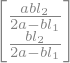

In [64]:
Kk = sy.Matrix([sol[0], 1/a*sol[0]])
Kk

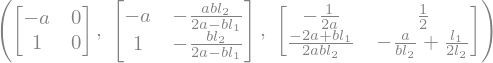

In [67]:
AA = A.subs([(k, b*tau),(tau, 1/a)])
BB = B.subs([(k, b*tau),(tau, 1/a)])
BB 
AminKkC = AA-Kk*C
AminKkCinv = AminKkC.inv()
AA, AminKkC, AminKkCinv

In [68]:
sy.simplify(L*AminKkCinv*BB)

In [63]:
L